In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
#Function to calculate the power and current for the inverter, assuming 98% efficiency

def fn(i, vdc, eff = 0.98, vph = 240, pf = 1):
    idc = 0
    for j in i:
        idc += j
    
    pdc = idc*vdc
    pac = pdc*eff
    iph = pac/(vph*(3**0.5)*pf)

    return [pac, pdc, idc, iph]

In [3]:
df = pd.read_csv('dataSample1.csv')
df.head()

,Time,AC Power (kW),DC Power (kW),Cumulative AC Energy (kWh),Efficiency (%),DC Voltage (V),R PHASE Voltage (V),Y PHASE Voltage (V),B PHASE Voltage (V),DC Current (Amperes),...,Coil Temperature(° C),Ambient Temperature(° C),Today’s Energy(kWh),SMB1 Total Current(A),SMB2 Total Current(A),SMB3 Total Current(A),SMB4 Total Current(A),SMB5 Total Current(A),SMB6 Total Current(A),SMB7 Total Current(A)
0,01/02/2021 00:00,0.0,0.0,7486246,0.0,13,233.6,231.1,231.7,0.0,...,39.3,24.1,7010.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01/02/2021 00:01,0.0,0.0,7486246,0.0,13,233.8,231.3,231.9,0.0,...,39.2,24.1,7010.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01/02/2021 00:02,0.0,0.0,7486246,0.0,13,233.5,231.1,231.3,0.0,...,39.2,24.2,7010.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01/02/2021 00:03,0.0,0.0,7486246,0.0,13,233.5,231.1,231.3,0.0,...,39.2,24.2,7010.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01/02/2021 00:04,0.0,0.0,7486246,0.0,13,233.7,231.2,231.8,0.0,...,39.1,24.2,7010.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
smb_columns = ['SMB1 Total Current(A)', 'SMB2 Total Current(A)', 'SMB3 Total Current(A)', 
               'SMB4 Total Current(A)', 'SMB5 Total Current(A)', 'SMB6 Total Current(A)', 
               'SMB7 Total Current(A)']

vdc_columns = ['DC Voltage (V)']

# Create the 2D array with only SMB currents
smb_current_array = df[smb_columns].values

# Create the array with only DC voltages
vdc_array = df[vdc_columns].values

# Optionally, print the first 5 rows for inspection
print(smb_current_array[600:605])
print(vdc_array[600:605])

[[185.9 184.  184.2 184.1 182.7 185.9 185.4]
 [152.2 152.  149.  146.  150.3 150.6 148.7]
 [168.7 169.5 169.4 169.3 169.2 170.3 172. ]
 [178.8 181.  179.6 179.1 180.3 170.3 172. ]
 [178.8 181.  179.6 179.1 180.3 181.6 179.4]]
[[674]
 [704]
 [691]
 [690]
 [692]]


In [5]:
pac = [] # Power AC Predicted
for i in range(0, len(smb_current_array)):
    pac.append(fn(smb_current_array[i], vdc_array[i])[0])

pac_act = df['AC Power (kW)'].values # Power AC Actual

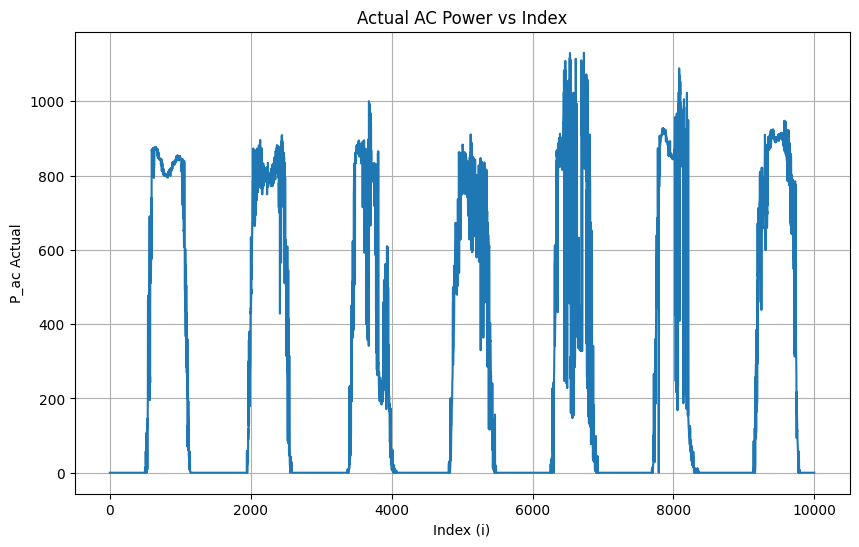

In [6]:
plt.figure(figsize=(10,6))
plt.plot(range(10000), pac_act[:10000])
plt.title('Actual AC Power vs Index')
plt.xlabel('Index (i)')
plt.ylabel('P_ac Actual')
plt.grid(True)
plt.show()

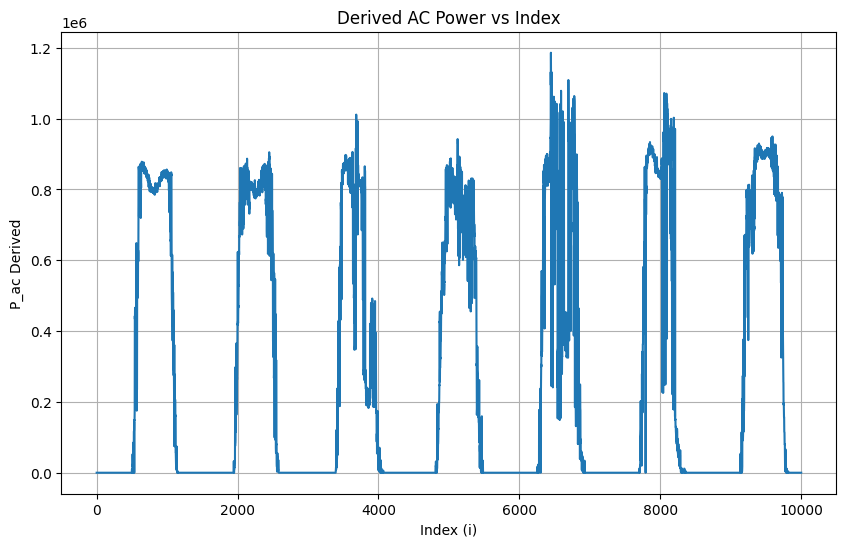

In [7]:
plt.figure(figsize=(10,6))
plt.plot(range(10000), pac[:10000])
plt.title('Derived AC Power vs Index')
plt.xlabel('Index (i)')
plt.ylabel('P_ac Derived')
plt.grid(True)
plt.show()